In [1]:
# 01_exploratory_analysis.ipyb

# Exploratory Data Analysis: Kohli in the Clutch

This notebook performs a basic exploratory analysis on Virat Kohli's match-by-match performance data, focusing on key contextual and performance metrics. The insights gathered here will guide how we define and evaluate "clutch" performances in later steps.

## Imports & Setup

In [2]:
# Basic Setup
import sys
import os
sys.path.append(os.path.abspath(".."))

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.plot_utils import save_plot

In [4]:
# Set seaborn theme
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

## Load Dataset

Dataset contains match-by-match performance data for Virat Kohli across key matches, with columns like runs, dismissal type, match context, and clutch labels.

In [5]:
df = pd.read_csv('../data/raw/raw_data.csv')

## Basic Overview & Cleaning

In [6]:
print("Dataset shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)

Dataset shape: (10, 18)

Column types:
match_id               object
date                   object
opposition             object
match_type             object
match_stage            object
venue                  object
toss_win               object
match_winner           object
target_score            int64
is_chasing               bool
arrival_time           object
runs_scored             int64
balls_faced             int64
dismissal              object
dismissal_time         object
result                 object
clutch_label           object
player_of_the_match    object
dtype: object


In [7]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [8]:
# Ensure 'clutch_label' is a category
df['clutch_label'] = df['clutch_label'].astype('category')

In [9]:
# Changing 'is_chasing' to a boolean category
df['is_chasing'] = df['is_chasing'].astype(str).str.lower().map({'true': True, 'false': False})

In [10]:
# Checking for missing value
print('Missing Values:\n')
df.isnull().sum()

Missing Values:



match_id               0
date                   0
opposition             0
match_type             0
match_stage            0
venue                  0
toss_win               0
match_winner           0
target_score           0
is_chasing             0
arrival_time           0
runs_scored            0
balls_faced            0
dismissal              0
dismissal_time         3
result                 0
clutch_label           0
player_of_the_match    0
dtype: int64

In [11]:
df['dismissal_time'] = df['dismissal_time'].fillna(-1)

In [12]:
# 5. Value Counts for Key Categorical Columns
print("Match Types:\n", df['match_type'].value_counts(), "\n")
print("Opposition Teams:\n", df['opposition'].value_counts(), "\n")
print("Match Stages:\n", df['match_stage'].value_counts(), "\n")
print("Results:\n", df['result'].value_counts())

Match Types:
 match_type
ODI    6
T20    4
Name: count, dtype: int64 

Opposition Teams:
 opposition
Australia       4
Pakistan        2
New Zealand     1
Sri Lanka       1
Bangladesh      1
South Africa    1
Name: count, dtype: int64 

Match Stages:
 match_stage
Bilateral     5
Group         2
Final         2
Semi-Final    1
Name: count, dtype: int64 

Results:
 result
India Win     6
India Lost    4
Name: count, dtype: int64


## Basic EDA

### Kohli's Run Distribution

Plot saved to: /Users/viral/Code/Projects/project/outputs/visuals/01_exploratory_analysis/Kohli_run_distribution-bucket_wise.png


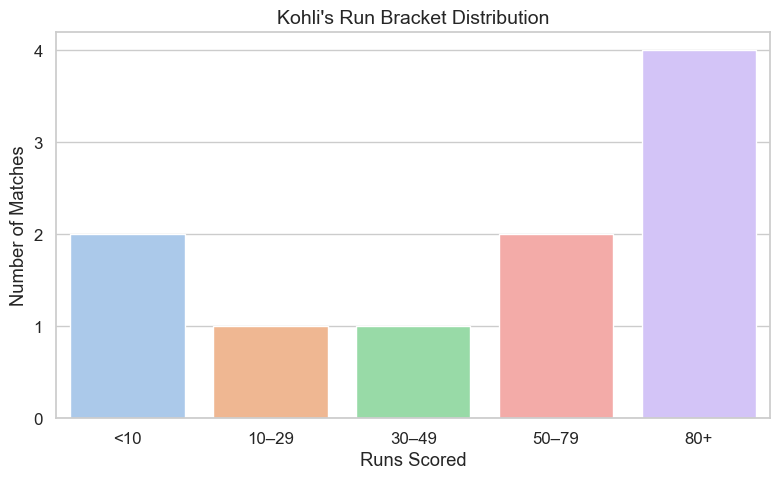

In [13]:
# Basic run bucket function
def get_run_bracket(runs):
    if runs < 10:
        return '<10'
    elif runs < 30:
        return '10–29'
    elif runs < 50:
        return '30–49'
    elif runs < 80:
        return '50–79'
    else:
        return '80+'

df['run_bracket'] = df['runs_scored'].apply(get_run_bracket)

# Set bracket order
bracket_order = ['<10', '10–29', '30–49', '50–79', '80+']

# Plot
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.countplot(data=df, x='run_bracket', order=bracket_order, palette='pastel')

# Clean y-axis with integer ticks
max_count = df['run_bracket'].value_counts().max()
ax.set_yticks(np.arange(0, max_count+1, 1))

# Labels
plt.title("Kohli's Run Bracket Distribution", fontsize=14)
plt.xlabel("Runs Scored")
plt.ylabel("Number of Matches")
plt.tight_layout()

# Save
save_plot('Kohli_run_distribution-bucket_wise.png', subfolder='01_exploratory_analysis')

This plot shows how often Virat Kohli's scores fell within defined performance brackets across the selected matches.

### Virat Kohli's Runs vs Balls Faced

Plot saved to: /Users/viral/Code/Projects/project/outputs/visuals/01_exploratory_analysis/Kohli_runs-vs-balls_faced.png


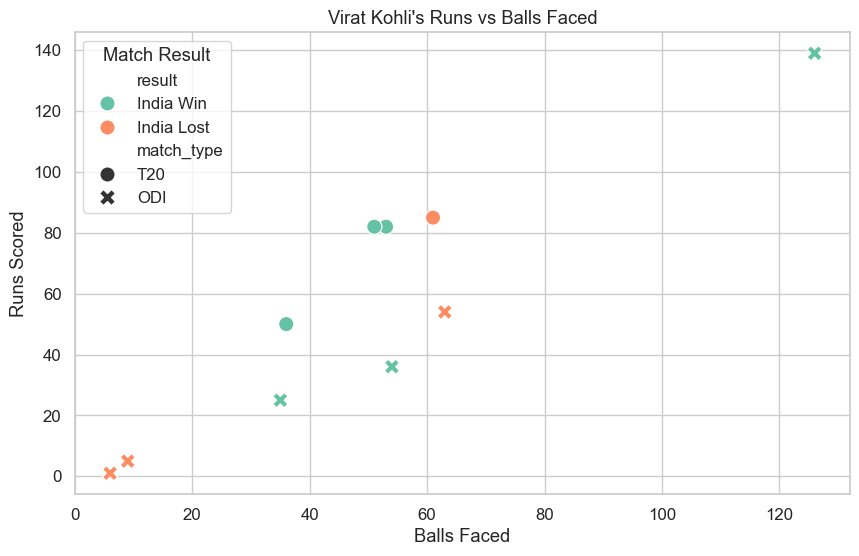

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='balls_faced', y='runs_scored', 
    hue='result', style='match_type', 
    data=df, s=120, palette='Set2'
)
plt.title("Virat Kohli's Runs vs Balls Faced")
plt.xlabel("Balls Faced")
plt.ylabel("Runs Scored")
plt.grid(True)
plt.legend(title='Match Result')

# Save
save_plot('Kohli_runs-vs-balls_faced.png', subfolder='01_exploratory_analysis')

Each dot represents a match. Higher up means more runs, rightward means more balls. Color indicates whether India won or lost. Most winning performances cluster around high run counts with fewer balls.

### Virat Kohli's Dismissal Types

Plot saved to: /Users/viral/Code/Projects/project/outputs/visuals/01_exploratory_analysis/Kohli_dismissal_type.png


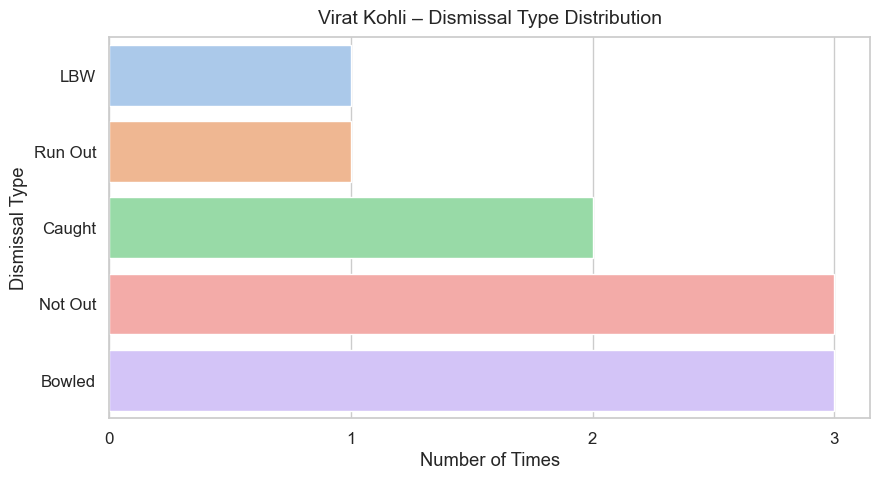

In [15]:
# Count and sort dismissal types
dismissal_counts = df['dismissal'].value_counts().sort_values()

# Set up plot
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
ax = sns.barplot(
    x=dismissal_counts.values,
    y=dismissal_counts.index,
    palette="pastel"
)

# Set integer x-axis ticks
max_count = dismissal_counts.max()
ax.set_xticks(np.arange(0, max_count + 1, 1))

# Labels and title
plt.title("Virat Kohli – Dismissal Type Distribution", fontsize=14, pad=10)
plt.xlabel("Number of Times")
plt.ylabel("Dismissal Type")
plt.tight_layout()

# Save
save_plot('Kohli_dismissal_type.png', subfolder='01_exploratory_analysis')

### Key Observations

- Kohli scores higher in matches India wins — a trait that supports the idea of clutch impact.
- The dataset is well-balanced and ready for clutch scoring analysis.


## Saving Processed DataFrame

In [16]:
# df.to_csv('../data/processed/processed_data.csv', index=False)